## Linear regression workbook

This workbook will walk you through a linear regression example. It will provide familiarity with Jupyter Notebook and Python.  Please print (to pdf) a completed version of this workbook for submission with HW #1.

ECE C147/C247, Winter Quarter 2021, Prof. J.C. Kao, TAs: N. Evirgen, A. Ghosh, S. Mathur, T. Monsoor, G. Zhao

In [1]:
import numpy as np 
import matplotlib.pyplot as plt

#allows matlab plots to be generated in line
%matplotlib inline 

### Data generation

For any example, we first have to generate some appropriate data to use. The following cell generates data according to the model: $y = x - 2x^2 + x^3 + \epsilon$

Text(0, 0.5, '$y$')

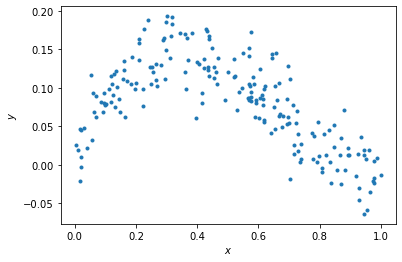

In [2]:
np.random.seed(0)  # Sets the random seed.
num_train = 200     # Number of training data points

# Generate the training data
x = np.random.uniform(low=0, high=1, size=(num_train,))
y = x - 2*x**2 + x**3 + np.random.normal(loc=0, scale=0.03, size=(num_train,))
f = plt.figure()
ax = f.gca()
ax.plot(x, y, '.')
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')

### QUESTIONS:

Write your answers in the markdown cell below this one:

(1) What is the generating distribution of $x$?

(2) What is the distribution of the additive noise $\epsilon$?

### ANSWERS:

(1) The generating distribution of $x$ is a uniform distribution $U$(a=0,b=1)

(2) The distribution of the additive noise $\epsilon$ is a normal distribution $N$($\mu=0$,$\sigma=0.03$)

### Fitting data to the model (5 points)

Here, we'll do linear regression to fit the parameters of a model $y = ax + b$.

In [3]:
# xhat = (x, 1)
xhat = np.vstack((x, np.ones_like(x)))

# ==================== #
# START YOUR CODE HERE #
# ==================== #
# GOAL: create a variable theta; theta is a numpy array whose elements are [a, b]

theta = np.matmul(np.linalg.inv(np.matmul(xhat,xhat.T)),np.matmul(xhat,y))
# ================== #
# END YOUR CODE HERE #
# ================== #

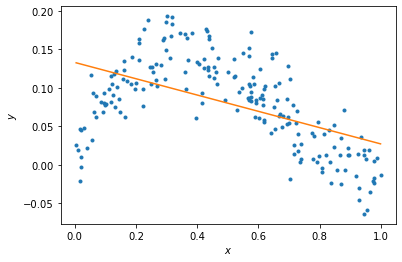

In [4]:
# Plot the data and your model fit.
f = plt.figure()
ax = f.gca()
ax.plot(x, y, '.')
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')

# Plot the regression line
xs = np.linspace(min(x), max(x),50)
xs = np.vstack((xs, np.ones_like(xs)))
plt.plot(xs[0,:], theta.dot(xs))

### QUESTIONS

(1) Does the linear model under- or overfit the data?

(2) How to change the model to improve the fitting?

### ANSWERS

(1) The line underfits the data.

(2) To improve the model fit, more complexity to the model should be added, i.e. more model parameters.

### Fitting data to the model (10 points)

Here, we'll now do regression to polynomial models of orders 1 to 5.  Note, the order 1 model is the linear model you prior fit.

In [5]:
N = 5
xhats = []
thetas = []

# ==================== #
# START YOUR CODE HERE #
# ==================== #

# GOAL: create a variable thetas.
# thetas is a list, where theta[i] are the model parameters for the polynomial fit of order i+1.
#   i.e., thetas[0] is equivalent to theta above.
#   i.e., thetas[1] should be a length 3 np.array with the coefficients of the x^2, x, and 1 respectively.
#   ... etc.

xhat = np.vstack((x**5,x**4,x**3,x**2,x, np.ones_like(x)))
xhats = [xhat[i:,:] for i in range(N-1,-1,-1)]

theta_derivation = lambda inp: np.matmul(np.linalg.inv(np.matmul(inp,inp.T)),np.matmul(inp,y))

thetas = [theta_derivation(xhats[i]) for i in range(0,N)]

pass

# ================== #
# END YOUR CODE HERE #
# ================== #

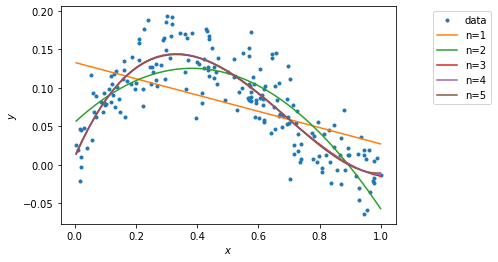

In [6]:
# Plot the data
f = plt.figure()
ax = f.gca()
ax.plot(x, y, '.')
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')

# Plot the regression lines
plot_xs = []
for i in np.arange(N):
    if i == 0:
        plot_x = np.vstack((np.linspace(min(x), max(x),50), np.ones(50)))
    else:
        plot_x = np.vstack((plot_x[-2]**(i+1), plot_x))                              
    plot_xs.append(plot_x)

for i in np.arange(N):
    ax.plot(plot_xs[i][-2,:], thetas[i].dot(plot_xs[i]))

labels = ['data']
[labels.append('n={}'.format(i+1)) for i in np.arange(N)]
bbox_to_anchor=(1.3, 1)
lgd = ax.legend(labels, bbox_to_anchor=bbox_to_anchor)

### Calculating the training error (10 points)

Here, we'll now calculate the training error of polynomial models of orders 1 to 5.

In [18]:
training_errors = []

# ==================== #
# START YOUR CODE HERE #
# ==================== #

# GOAL: create a variable training_errors, a list of 5 elements,
# where training_errors[i] are the training loss for the polynomial fit of order i+1.
f = lambda theta,x,y: np.mean((np.matmul(x.T,theta)-y)**2)

training_errors = [f(thetas[i],xhats[i],y) for i in range(0,N)]
pass

# ================== #
# END YOUR CODE HERE #
# ================== #

print ('Training errors are: \n', training_errors)

Training errors are: 
 [0.0023799610883627007, 0.001092492220926853, 0.0008169603801105374, 0.0008165353735296982, 0.0008161479195525297]


### QUESTIONS

(1) What polynomial has the best training error?

(2) Why is this expected?

### ANSWERS

(1) The polynomial with the best training error is polynomial of order 5.

(2) This is expected because as the model complexity increases, the error should be reduced on the training data. If the polynomial order were to approach the number of data points trained on, the training error would approach zero. 

### Generating new samples and testing error (5 points)

Here, we'll now generate new samples and calculate testing error of polynomial models of orders 1 to 5.

Text(0, 0.5, '$y$')

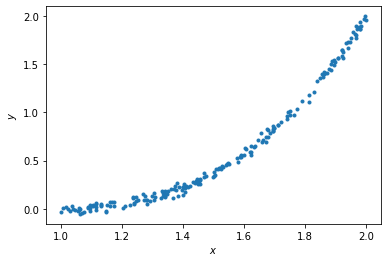

In [19]:
x = np.random.uniform(low=1, high=2, size=(num_train,))
y = x - 2*x**2 + x**3 + np.random.normal(loc=0, scale=0.03, size=(num_train,))
f = plt.figure()
ax = f.gca()
ax.plot(x, y, '.')
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')

In [20]:
xhats = []
for i in np.arange(N):
    if i == 0:
        xhat = np.vstack((x, np.ones_like(x)))
        plot_x = np.vstack((np.linspace(min(x), max(x),50), np.ones(50)))
    else:
        xhat = np.vstack((x**(i+1), xhat))
        plot_x = np.vstack((plot_x[-2]**(i+1), plot_x))
                              
    xhats.append(xhat)

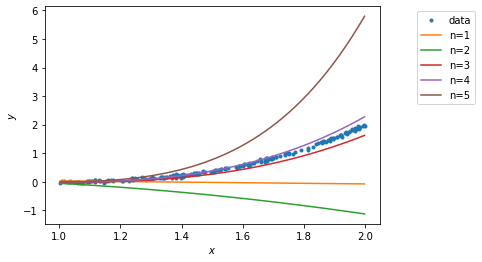

In [21]:
# Plot the data
f = plt.figure()
ax = f.gca()
ax.plot(x, y, '.')
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')

# Plot the regression lines
plot_xs = []
for i in np.arange(N):
    if i == 0:
        plot_x = np.vstack((np.linspace(min(x), max(x),50), np.ones(50)))
    else:
        plot_x = np.vstack((plot_x[-2]**(i+1), plot_x))                              
    plot_xs.append(plot_x)

for i in np.arange(N):
    ax.plot(plot_xs[i][-2,:], thetas[i].dot(plot_xs[i]))

labels = ['data']
[labels.append('n={}'.format(i+1)) for i in np.arange(N)]
bbox_to_anchor=(1.3, 1)
lgd = ax.legend(labels, bbox_to_anchor=bbox_to_anchor)

In [22]:
testing_errors = []

# ==================== #
# START YOUR CODE HERE #
# ==================== #

# GOAL: create a variable testing_errors, a list of 5 elements,
# where testing_errors[i] are the testing loss for the polynomial fit of order i+1.
f = lambda theta,x,y: np.mean( (np.matmul(x.T,theta)-y)**2) 

testing_errors = [f(thetas[i],xhats[i],y) for i in range(0,N)]
pass

# ================== #
# END YOUR CODE HERE #
# ================== #

print ('Testing errors are: \n', testing_errors)

Testing errors are: 
 [0.8086165184550587, 2.1319192445057893, 0.03125697108276392, 0.011870765189474703, 2.1491021817652625]


### QUESTIONS

(1) What polynomial has the best testing error?

(2) Why polynomial models of orders 5 does not generalize well?

### ANSWERS

(1) A polynomial of order 4.

(2) Polynomial of order 5 does not generalize well because we begin to overfit the training data. Therefore, the model variance is extremely high, even though the model bias is low, causing a not desired mean squared error.